In [22]:
import os
import pandas as pd
import re
import matplotlib.pyplot as plt

In [23]:
download_directory = 'C:/Users/lenovo/Desktop/UCL/Final dissertation/code/Data/'  
downloadRec = pd.DataFrame(columns=['CompanyTicker', 'Year', 'CSV.Length'])

In [24]:
# Function to extract details from the filename
def extract_details_from_filename(filename):
    parts = filename.replace('.csv', '').split('-')
    CompanyTicker = parts[0]
    Year = parts[1]
    #Find the split
    csv_path = os.path.join(download_directory, filename)
    with open(csv_path, 'r', encoding='utf-8') as file:
        content = file.read()

    CSV_Length = content.count('\n')
    Status = 'TRUE'
    return CompanyTicker, Year, CSV_Length

# List to store individual dataframes
dfs = []

In [25]:
for filename in os.listdir(download_directory):
    if filename.endswith('.csv'):  # Adjust the file extension if necessary
        CompanyTicker, Year, CSV_Length = extract_details_from_filename(filename)
        df = pd.DataFrame([{
            'CompanyTicker': CompanyTicker,
            'Year': Year,
            'CSV.Length': CSV_Length
        }])
        dfs.append(df)

if dfs:
    downloadRec = pd.concat(dfs, ignore_index=True)


In [26]:
downloadRec.to_csv('reconstructed_downloadRec.csv', index=False)  # Update the path accordingly

print(downloadRec)

     CompanyTicker  Year  CSV.Length
0             AAON  2011         186
1             AAON  2012         201
2             AAON  2013         223
3             AAON  2014         236
4             AAON  2015         235
...            ...   ...         ...
2045           ZWS  2018           8
2046           ZWS  2019           8
2047           ZWS  2021          11
2048           ZWS  2022          11
2049           ZWS  2023          18

[2050 rows x 3 columns]


In [27]:
downloadRec['Year'] = downloadRec['Year'].astype(float).astype(int)

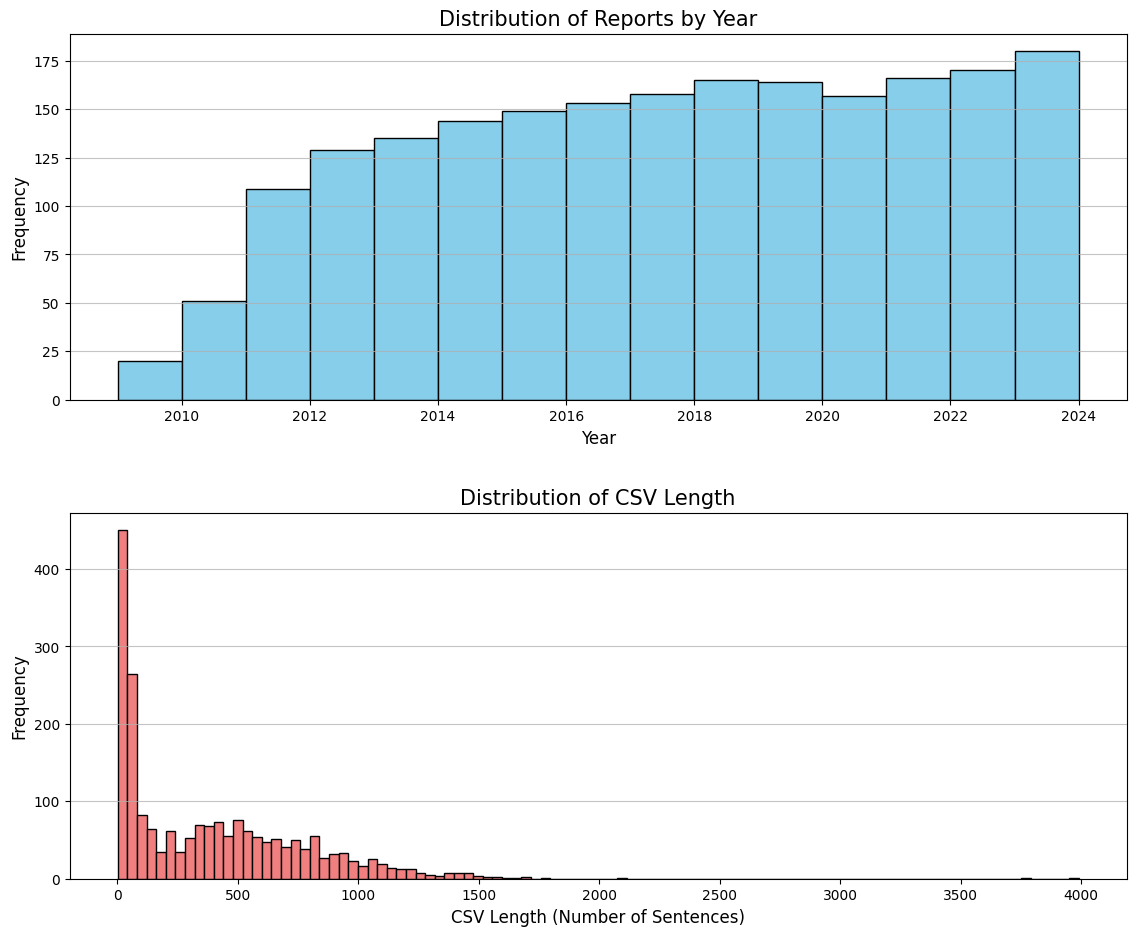

In [28]:

fig, axs = plt.subplots(2, 1, figsize=(12, 10), facecolor='white')

# Histogram for 'Year'
axs[0].hist(downloadRec['Year'], bins=range(downloadRec['Year'].min(), downloadRec['Year'].max() + 1), edgecolor='black', color='skyblue')
axs[0].set_title('Distribution of Reports by Year', fontsize=15)
axs[0].set_xlabel('Year', fontsize=12)
axs[0].set_ylabel('Frequency', fontsize=12)
axs[0].grid(axis='y', alpha=0.75)

# Histogram for 'CSV.Length'
axs[1].hist(downloadRec['CSV.Length'], bins=100, edgecolor='black', color='lightcoral')
axs[1].set_title('Distribution of CSV Length', fontsize=15)
axs[1].set_xlabel('CSV Length (Number of Sentences)', fontsize=12)
axs[1].set_ylabel('Frequency', fontsize=12)
axs[1].grid(axis='y', alpha=0.75)

# Adjust layout for better spacing
plt.tight_layout(pad=3.0)

# Display the plots
plt.show()


In [35]:
# Filter out rows where CSV.Length < 50
filtered_df = downloadRec[downloadRec['CSV.Length'] < 20]

# Print CompanyTicker and Year for the filtered rows
display(filtered_df[['CompanyTicker', 'Year','CSV.Length']])

,CompanyTicker,Year,CSV.Length
55,AIN,2012,8
96,ALLE,2016,16
97,ALLE,2017,18
104,ALNT,2011,10
105,ALNT,2012,10
...,...,...,...
2045,ZWS,2018,8
2046,ZWS,2019,8
2047,ZWS,2021,11
2048,ZWS,2022,11


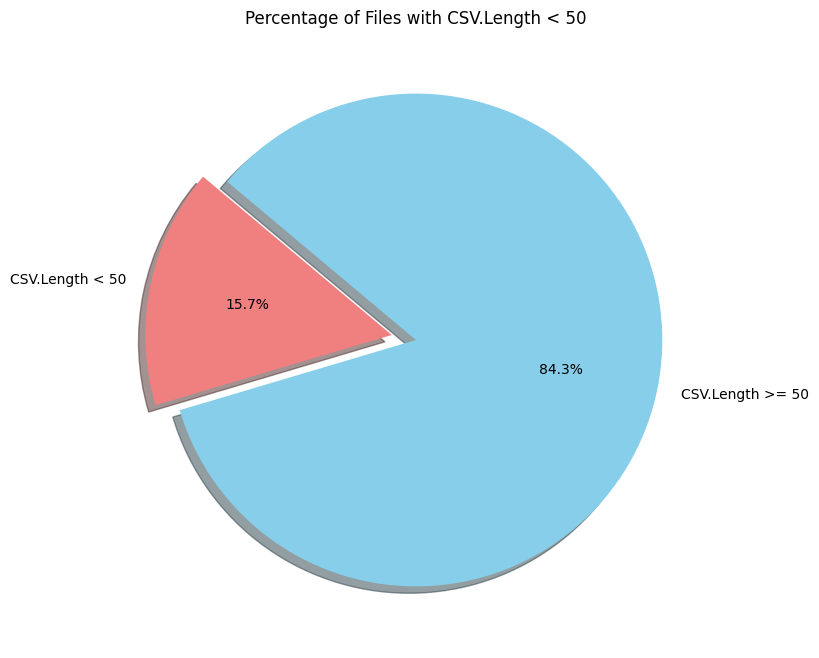

In [36]:
# Calculate the percentage of files with CSV.Length < 50
num_files_below_50 = len(filtered_df)
total_files = len(downloadRec)
percentage_below_50 = (num_files_below_50 / total_files) * 100

# Create the pie chart
labels = ['CSV.Length < 50', 'CSV.Length >= 50']
sizes = [num_files_below_50, total_files - num_files_below_50]
colors = ['lightcoral', 'skyblue']
explode = (0.1, 0)  # explode the first slice

fig, ax = plt.subplots(figsize=(8, 8))
ax.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
       shadow=True, startangle=140)
ax.set_title('Percentage of Files with CSV.Length < 50')

# Display the pie chart
plt.show()